**EFG Wholesales Company** 

**24/06/2025**

**Data Analyst - Oluwatoyin Egunjobi**


**Primary Business Problem:**

"How can we optimize our customer acquisition and retention strategies to maximize revenue growth across different customer segments while efficiently allocating marketing resources?"



In [2]:
import pandas as pd

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv (r"train.csv")

In [10]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [16]:
#Postal code column is in float and needs to be change to int
df ["Postal Code"].fillna(0, inplace = True) #Filling null values
df ["Postal Code"] = df["Postal Code"].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
#Checking for duplicates
if df.duplicated().sum() > 0: #
    print("duplicates exists")
else:
    print("No duplicates found")

In [41]:
#Checking for the types of customers we have.
#creating a new variable
types_of_customers = df['Segment'].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


  Type Of Customer  count
0         Consumer   5101
1        Corporate   2953
2      Home Office   1746


([<matplotlib.patches.Wedge at 0x13b8f93a0>,
 [Text(-0.07082911608159115, 1.0977172843292122, 'Consumer'),
  Text(-0.5228074775852011, -0.9678183411059121, 'Corporate'),
  Text(0.9321462996405261, -0.584040474681742, 'Home Office')],
 [Text(-0.038634063317231536, 0.5987548823613884, '52.1%'),
  Text(-0.28516771504647326, -0.5279009133304975, '30.1%'),
  Text(0.5084434361675596, -0.31856753164458657, '17.8%')])

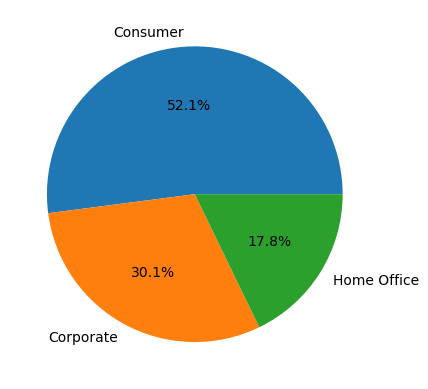

In [83]:
#I want to count the numbers of customers in each 3 segments
numbers_of_customers = df['Segment'].value_counts().reset_index()

#Renaming the Segment column to Type_of_customers for better understanding
numbers_of_customers = numbers_of_customers.rename(columns={'Segment' : 'Type Of Customer'})
print(numbers_of_customers)

#Ploting a Piechart visualization to view the numbers of customers better.
plt.pie(numbers_of_customers['count'], labels=numbers_of_customers['Type Of Customer'], autopct='%1.1f%%')

  Type Of Customers   Total Sales
0          Consumer  1.148061e+06
1         Corporate  6.884941e+05
2       Home Office  4.249822e+05


([<matplotlib.patches.Wedge at 0x13b77f4d0>,
 [Text(-0.026420839765541018, 1.0996826538715994, 'Consumer'),
  Text(-0.5902005886829921, -0.9282581888236967, 'Corporate'),
  Text(0.913814451312435, -0.612326014940206, 'Home Office')],
 [Text(-0.014411367144840554, 0.5998269021117814, '50.8%'),
  Text(-0.3219275938270865, -0.5063226484492891, '30.4%'),
  Text(0.49844424617041905, -0.33399600814920327, '18.8%')])

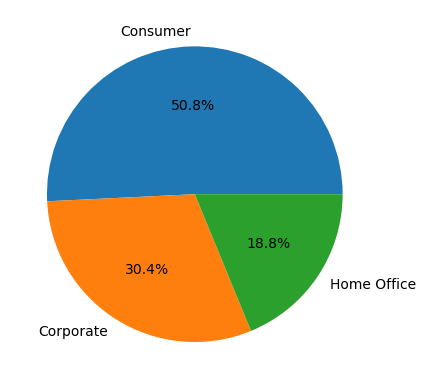

In [81]:
#How much sales each segment makes in total
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment' : 'Type Of Customers', 'Sales' : 'Total Sales'})
print(sales_per_segment)

#Ploting a Piechart visualization to view the Total Sales of each segments.
plt.pie(sales_per_segment['Total Sales'], labels=sales_per_segment['Type Of Customers'], autopct='%1.1f%%')

In [93]:
#I want to know our customers by the order frequencies, so has to know how to maintain/increase customer's satisfactions.

#EDA to know the columns to use for my analysis
df.head(3)

#Creating a new variable to know customers and their total orders
customers_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()
customers_order_frequency.rename(columns={'Order ID' : 'Total Orders'}, inplace = True)
repeat_customers = customers_order_frequency[customers_order_frequency['Total Orders'] >= 1].sort_values(by='Total Orders', ascending = False)

print(repeat_customers.head(20).reset_index(drop=True))




   Customer ID        Customer Name      Segment  Total Orders
0     WB-21850        William Brown     Consumer            35
1     PP-18955           Paul Prost  Home Office            34
2     MA-17560         Matt Abelman  Home Office            34
3     JL-15835             John Lee     Consumer            33
4     CK-12205  Chloris Kastensmidt     Consumer            32
5     SV-20365          Seth Vernon     Consumer            32
6     JD-15895     Jonathan Doherty    Corporate            32
7     AP-10915       Arthur Prichep     Consumer            31
8     ZC-21910     Zuschuss Carroll     Consumer            31
9     EP-13915           Emily Phan     Consumer            31
10    LC-16870        Lena Cacioppo     Consumer            30
11    Dp-13240          Dean percer  Home Office            29
12    BM-11650           Brian Moss    Corporate            29
13    GT-14710            Greg Tran     Consumer            29
14    KL-16645         Ken Lonsdale     Consumer       

In [95]:
#I want to identify our top-spenders

#creating a new varible
customer_sales= df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()
top_spenders= customer_sales.sort_values(by='Sales', ascending=False)

print(top_spenders.head(20).reset_index(drop=True))

   Customer ID       Customer Name      Segment      Sales
0     SM-20320         Sean Miller  Home Office  25043.050
1     TC-20980        Tamara Chand    Corporate  19052.218
2     RB-19360        Raymond Buch     Consumer  15117.339
3     TA-21385        Tom Ashbrook  Home Office  14595.620
4     AB-10105       Adrian Barton     Consumer  14473.571
5     KL-16645        Ken Lonsdale     Consumer  14175.229
6     SC-20095        Sanjit Chand     Consumer  14142.334
7     HL-15040        Hunter Lopez     Consumer  12873.298
8     SE-20110        Sanjit Engle     Consumer  12209.438
9     CC-12370  Christopher Conant     Consumer  12129.072
10    TS-21370        Todd Sumrall    Corporate  11891.751
11    GT-14710           Greg Tran     Consumer  11820.120
12    BM-11140        Becky Martin     Consumer  11789.630
13    SV-20365         Seth Vernon     Consumer  11470.950
14    CJ-12010     Caroline Jumper     Consumer  11164.974
15    CL-12565         Clay Ludtke     Consumer  10880.5

#1 Customer Segment Analysis: Volume vs. Value Dynamics

My segmentation analysis reveals a compelling paradox in customer behavior across the three primary segments:
Consumer, Corporate, and Home Office. 
It demonstrates a clear distinction between transaction volume metrics and revenue performance indicators.

#2 Segment Composition and Scale:
The Consumer segment dominates our customer base, representing the largest portion of our clientele,
while the Home Office segment constitutes the smallest customer group.
This distribution pattern suggests that our business model has broad appeal to individual consumers.

#3 Revenue Performance Analysis:
Despite the Consumer segment generating the highest absolute sales volume, the Home Office segment demonstrates superior per-transaction value. 

#4 Strategic Implications:
My analysis reveals that transaction frequency serves as a poor proxy for customer value identification.
The Home Office segment, despite being our smallest customer base with the lowest transaction frequency, delivers the highest per-customer revenue contribution. 
 This suggests opportunities for targeted retention strategies for Home Office customers and potential upselling initiatives for the high-frequency Consumer segment to increase their transaction values. 
 
 Marketing and sales teams should cultivate and expand the more profitable Home Office segment. Increase the revenue growth of the consumer segment and increase the frequency and revenue of the corporate segment too.
